### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Archery']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 15111    Archery
15112    Archery
15113    Archery
15114    Archery
15115    Archery
          ...   
15621    Archery
15622    Archery
15623    Archery
15624    Archery
15625    Archery
Name: Sport, Length: 515, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 15111    NA
15112    NA
15113    NA
15114    NA
15115    NA
         ..
15621    NA
15622    NA
15623    NA
15624    NA
15625    NA
Name: Medal, Length: 515, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 15111 to 15625
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      515 non-null    int64  
 1   Unnamed: 0_x    515 non-null    int64  
 2   ID              515 non-null    int64  
 3   Name            515 non-null    object 
 4   Sex             515 non-null    object 
 5   Age             515 non-null    float64
 6   Height          515 non-null    float64
 7   Weight          515 non-null    float64
 8   NOC             515 non-null    object 
 9   Games           515 non-null    object 
 10  Year            515 non-null    int64  
 11  Season          515 non-null    object 
 12  City            515 non-null    object 
 13  Sport           515 non-null    object 
 14  Event           515 non-null    object 
 15  Medal           515 non-null    object 
 16  Team            515 non-null    object 
 17  Unnamed: 0_y    515 non-null 

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (386, 1) (386, 6)
Test Set  : (129, 1) (129, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
15391,20.0,70.0,172.0,4.890000e+12,126843000.0,38551.595279,NA
15518,16.0,88.0,183.0,2.470000e+11,17909754.0,13791.367542,NA
15288,20.0,90.0,180.0,6.488306e+10,47451600.0,1367.352433,Bronze
15507,30.0,81.0,183.0,1.800000e+11,46258200.0,3891.201992,NA
15140,23.0,92.0,175.0,1.050000e+12,127540423.0,8232.684002,NA
...,...,...,...,...,...,...,...
15162,17.0,84.0,184.0,6.130000e+11,20127400.0,30455.995310,NA
15312,40.0,73.0,175.0,1.229277e+10,2814226.0,4368.082247,NA
15472,18.0,75.0,193.0,2.680000e+12,65659790.0,40816.457074,NA
15265,27.0,86.0,189.0,4.150000e+11,19153000.0,21667.623871,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        452
Silver     23
Bronze     20
Gold       20
Name: Medal, dtype: int64


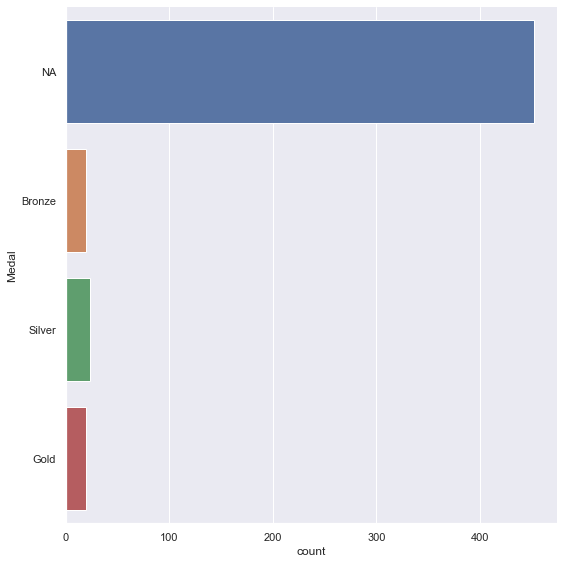

In [13]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(386, 6) (386, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1356, 6) (1356, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,20.000000,70.000000,172.000000,4.890000e+12,1.268430e+08,38551.595279,NA
1,16.000000,88.000000,183.000000,2.470000e+11,1.790975e+07,13791.367542,NA
2,20.000000,90.000000,180.000000,6.488306e+10,4.745160e+07,1367.352433,Bronze
3,30.000000,81.000000,183.000000,1.800000e+11,4.625820e+07,3891.201992,NA
4,23.000000,92.000000,175.000000,1.050000e+12,1.275404e+08,8232.684002,NA
...,...,...,...,...,...,...,...
1351,24.406281,95.625124,178.356231,2.390000e+12,5.882673e+07,40627.788751,Silver
1352,25.338041,84.107972,182.215945,1.733198e+12,6.138173e+07,27559.122321,Silver
1353,27.000000,85.063363,180.824381,1.860000e+13,3.231275e+08,57562.414996,Silver
1354,24.188904,87.455746,182.866579,1.376129e+12,5.729812e+07,23913.154295,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
15261,32.0,83.0,178.0,2.890000e+12,61806995.0,46758.461562
15440,21.0,75.0,182.0,2.730000e+11,63240121.0,4316.879786
15242,27.0,89.0,174.0,6.200000e+12,127629000.0,48578.301170
15326,21.0,73.0,180.0,2.410000e+11,10955141.0,21998.804032
15586,23.0,78.0,183.0,1.030000e+13,282162411.0,36503.799225
...,...,...,...,...,...,...
15240,20.0,89.0,174.0,4.820000e+12,127761000.0,37726.692809
15361,35.0,90.0,183.0,3.126153e+10,49175848.0,635.708964
15390,20.0,70.0,172.0,4.890000e+12,126843000.0,38551.595279
15396,25.0,89.0,168.0,2.310000e+11,27111069.0,8520.505038


Number of Medal Types : 4
Bronze    339
Gold      339
NA        339
Silver    339
Name: Medal, dtype: int64


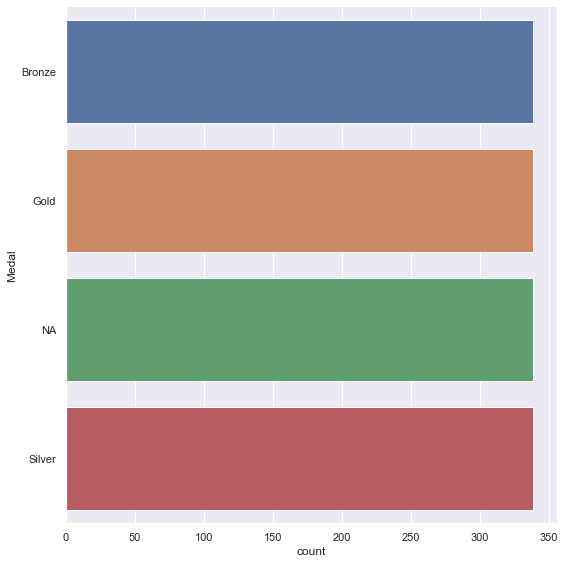

In [18]:
# Medal Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1017, 1) (1017, 6)
Test Set  : (339, 1) (339, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.976401179941003

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9085545722713865



<AxesSubplot:>

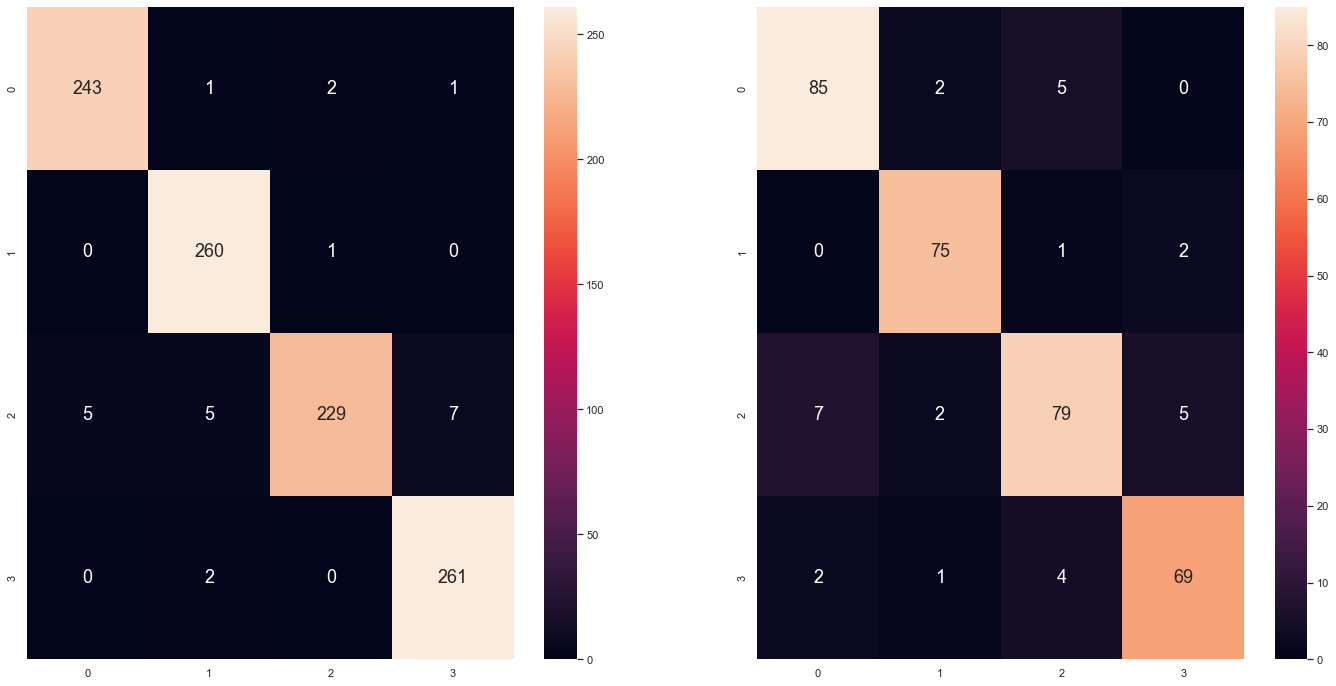

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 10)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

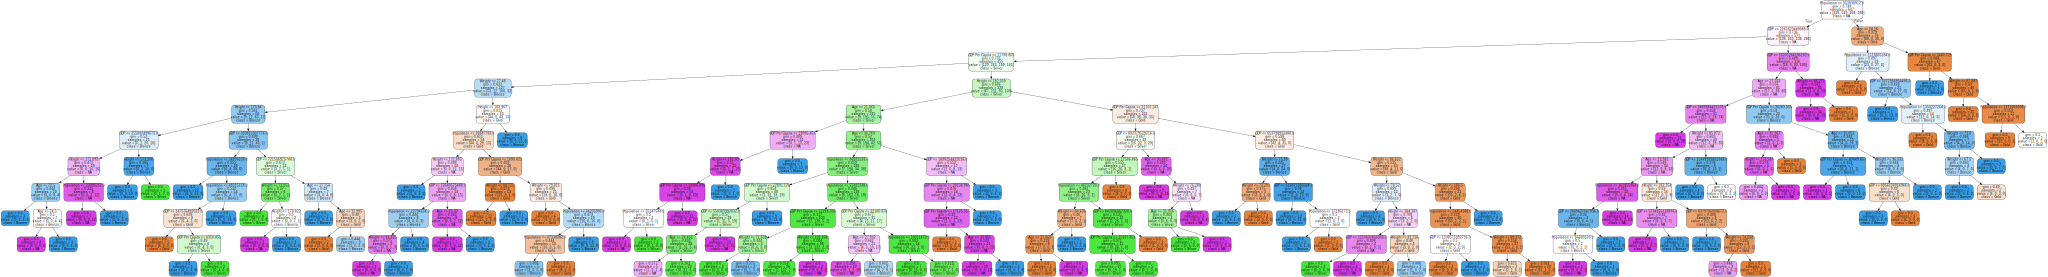

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
graph.render("Tree_male_ARCHERY")

'Tree_male_ARCHERY.pdf'

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.7596899224806202


<AxesSubplot:>

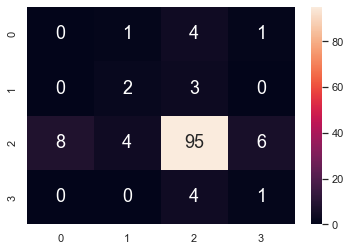

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})